<h3>Importing Necessary Libraries</h3>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

<h3>Exploring Datasets</h3>

In [3]:
train = pd.read_csv('/content/drive/My Drive/Animal Shelter/train.csv')
test = pd.read_csv('/content/drive/My Drive/Animal Shelter/test.csv')

train.head(10)

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner
5,A141142,1998,6,15 years,Dog,Labrador Retriever/Pit Bull,Black/White,Aged,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1.0,0 days 20:54:00.000000000,0.870833,15 years,1998-06-01 00:00:00,Spayed Female,5475,15.0,"(12.5, 15.0]",2013-11-17 11:40:00,11,2013,2013-11,Sunday,11,1.0,Return to Owner
6,A163459,1999,10,15 years,Dog,Miniature Schnauzer Mix,Black/Gray,Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472,15 years,1999-10-19 00:00:00,Intact Female,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,2014,2014-11,Friday,19,1.0,Return to Owner
7,A165752,1999,8,15 years,Dog,Lhasa Apso Mix,Brown/White,Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194,15 years,1999-08-18 00:00:00,Neutered Male,5475,15.0,"(12.5, 15.0]",NaN,9,2014,2014-09,Monday,16,1.0,Return to Owner
8,A178569,1999,3,15 years,Dog,Shetland Sheepdog Mix,White/Black,Normal,Public Assist,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2014-03-17 09:45:00,3,2014,2014-03,Monday,9,1.0,6 days 06:12:00.000000000,6.258333,15 years,1999-03-17 00:00:00,Neutered Male,5475,15.0,"(12.5, 15.0]",NaN,3,2014,2014-03,Sunday,15,1.0,Return to Owner
9,A189592,1997,8,18 years,Dog,Shetland Sheepdog Mix,Brown/White,Normal,Stray,Spayed Female,1,6570,18.0,"(17.5, 20.0]",2015-09-18 17:46:00,9,2015,2015-09,Friday,17,1.0,0 days 01:18:00.000000000,0.054167,18 years,1997-08-01 00:00:00,Spayed Female,6570,18.0,"(17.5, 20.0]",NaN,9,2015,2015-09,Friday,19,1.0,Return to Owner


In [4]:
print(f'training data has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test data has {test.shape[0]} rows and {test.shape[1]} columns')

training data has 47803 rows and 37 columns
test data has 31869 rows and 36 columns


In [5]:
train.isna().sum().sort_values(ascending=False)[:5]        #20% of the outcome_datetime feature is missing
#(train.isna().mean()*100).sort_values(ascending=False)[:5]

outcome_datetime    9619
sex_upon_intake        1
sex_upon_outcome       1
outcome_type           0
intake_type            0
dtype: int64

In [6]:
#luckily test data doesn't seem to have missing values
test.isna().sum().sort_values(ascending=False)[:5]

outcome_number               0
outcome_hour                 0
intake_month                 0
intake_datetime              0
age_upon_intake_age_group    0
dtype: int64

In [7]:
train.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 37 columns):
animal_id_outcome             47803 non-null object
dob_year                      47803 non-null int64
dob_month                     47803 non-null int64
age_upon_intake               47803 non-null object
animal_type                   47803 non-null object
breed                         47803 non-null object
color                         47803 non-null object
intake_condition              47803 non-null object
intake_type                   47803 non-null object
sex_upon_intake               47802 non-null object
count                         47803 non-null int64
age_upon_intake_(days)        47803 non-null int64
age_upon_intake_(years)       47803 non-null float64
age_upon_intake_age_group     47803 non-null object
intake_datetime               47803 non-null object
intake_month                  47803 non-null int64
intake_year                   47803 non-null int64
intake_month

In [9]:
train.describe()

,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number
count,47803.000000,47803.000000,47803.0,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,2012.197728,6.337531,1.0,841.679915,2.305972,6.596113,2014.600046,13.549087,1.144552,17.143366,855.319729,2.343342,6.650587,2014.638893,14.381545,1.144552
std,3.068255,3.342038,0.0,1100.557953,3.015227,3.460172,0.905731,3.179397,0.500055,46.600727,1103.598596,3.023558,3.490263,0.912706,3.456145,0.500055
min,1992.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000694,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,2011.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.049653,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000
50%,2013.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.972222,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000
75%,2014.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2015.000000,16.000000,1.000000,13.113889,1095.000000,3.000000,10.000000,2015.000000,17.000000,1.000000
max,2016.000000,12.000000,1.0,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000


Text(0, 0.5, 'Count')

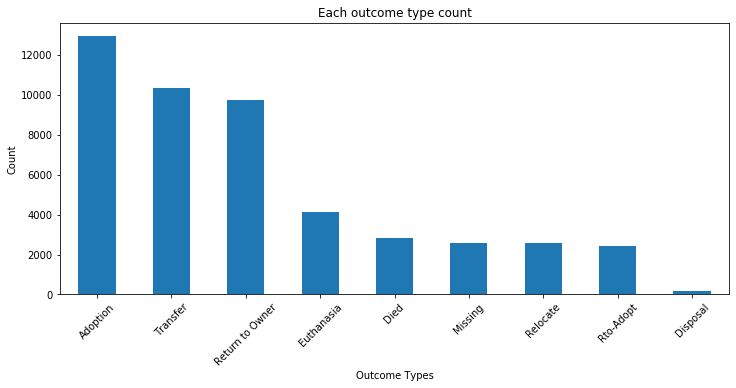

In [0]:
plt.figure(figsize=(12,5))
train['outcome_type'].value_counts().plot('bar')
plt.title('Each outcome type count')
plt.xticks(rotation=45)
plt.xlabel('Outcome Types')
plt.ylabel('Count')

In [0]:
train['outcome_type'].value_counts()/len(train)*100

Adoption           27.125913
Transfer           21.640901
Return to Owner    20.329268
Euthanasia          8.668912
Died                5.918039
Missing             5.436897
Relocate            5.382507
Rto-Adopt           5.125201
Disposal            0.372362
Name: outcome_type, dtype: float64

<h3>Observations:</h3>
            
        * count column has only one value : 1
        * does intake_number and outcome_number columns hold same value? If yes, any one of the columns can be dropped
          to avoid multicolinearity      
        * age_upon_intake can be coverted to int dtype
        * we have only 4 unique animal_types
        * intake_hour, intake_month, intake_year, intake_monthyear, intake_weekday columns have been created from
          intake_datetime column and this column can be used to create additional features. intake_monthyear column can be
          dropped to avoid multicolinearity.
        * time_in_shelter and time_in_shelter_days columns present the same value in different units.
        * age_upon_intake, age_upon_intake_(years) has almost same values and is true for outcome columns as well.
        * age_group bin can be modified with a class that represents this age group
        * outcome_datetime value has 20% missing value and can be dropped as we already have calculated outcome_month,
          outcome_year, outcome_monthyear, outcome_weekday, outcome_hour columns calculated from the this column. 
        * outcome types are highly imbalanced, we may upsampling, downsampling or SMOTE technique and need to choose 
          training, validation set carefully


<h3>Data Cleaning</h3>

In [0]:
train.outcome_number.equals(train.intake_number)

True

* does intake_number and outcome_number columns hold same value?
        Yes! Let's drop outcome_number colum for now

In [0]:
train.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

In [0]:
incorrectly_labelled = list(train.loc[(train['outcome_number']>=2) & (train['outcome_type']=='Died')].groupby('animal_id_outcome').size().sort_values(ascending=False).index)
len(incorrectly_labelled)

214

<h3>The outcome_number and target label seem to have discrepancy</h3>

        * For the animal_id :A705625, It was brought to org first time on 2015-07 as an Intact Male and has 
          and has outcome_type:Died. The same animal has come in again as neutered male on  2016-04. Had this 
          animal died on its first visit it couldn't have come the next time.
        * This case is true for all the died animals that has outcome_number>=2. The outcome label has 'Died' on 
          their first visit yet there have been another occurence.
        * Need to check the lables of other animals that came in multiple times


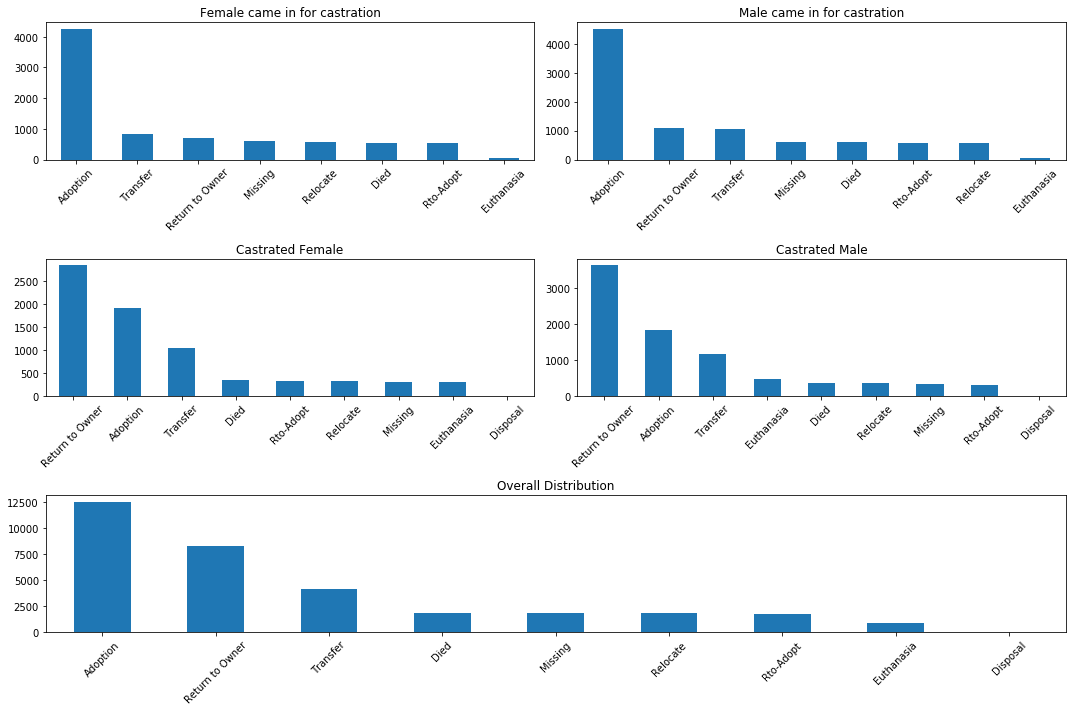

In [0]:
plt.figure(figsize=(15,10))

plt.subplot(321)
train[(train['sex_upon_intake']== 'Intact Female') & (train['sex_upon_outcome']== 'Spayed Female')]['outcome_type'].value_counts().plot('bar')
plt.title('Female came in for castration')
plt.xticks(rotation=45)

plt.subplot(322)
train[(train['sex_upon_intake'] == 'Intact Male') & (train['sex_upon_outcome'] == 'Neutered Male')]['outcome_type'].value_counts().plot('bar')
plt.title('Male came in for castration')
plt.xticks(rotation=45)

plt.subplot(323)
train[(train['sex_upon_intake'] == 'Spayed Female') & (train['sex_upon_outcome'] == 'Spayed Female')]['outcome_type'].value_counts().plot('bar')
plt.title('Castrated Female')
plt.xticks(rotation=45)

plt.subplot(324)
train[(train['sex_upon_intake'] == 'Neutered Male') & (train['sex_upon_outcome'] == 'Neutered Male')]['outcome_type'].value_counts().plot('bar')
plt.title('Castrated Male')
plt.xticks(rotation=45)

plt.subplot(313)
train[(train['sex_upon_outcome'] == 'Spayed Female') | (train['sex_upon_outcome'] == 'Neutered Male')]['outcome_type'].value_counts().plot('bar')
plt.title('Overall Distribution')
plt.xticks(rotation=45)

plt.tight_layout()

**NOTE:** Spayed females and Neutered Males that came into the organization for castration are more likely to get adopeted. A new feature can be created around this.

In [0]:
train.animal_type.unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

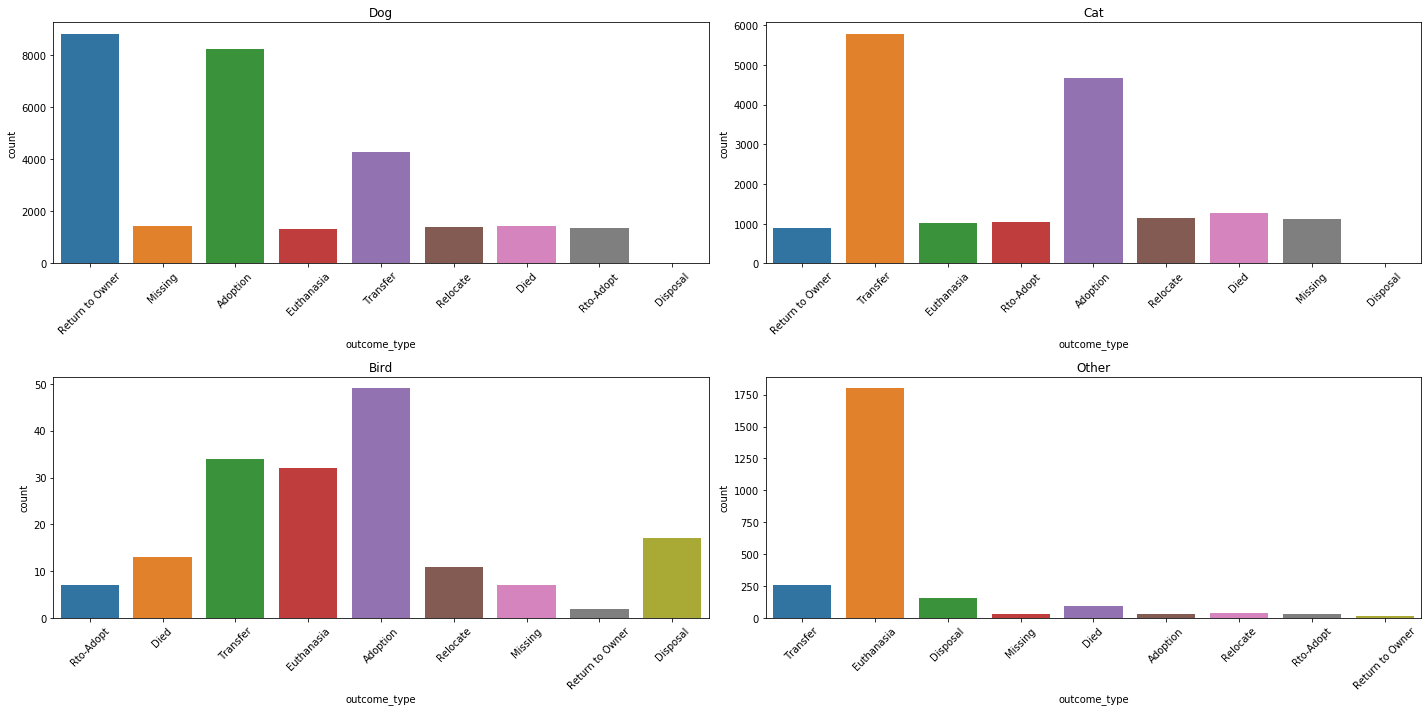

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

x = sns.countplot(x='outcome_type', data=train[train['animal_type']=='Dog'], ax=axes[0,0])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['animal_type']=='Cat'], ax=axes[0,1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['animal_type']=='Bird'], ax=axes[1,0])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['animal_type']=='Other'], ax=axes[1,1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

axes[0][0].set_title("Dog")
axes[0][1].set_title("Cat")
axes[1][0].set_title("Bird")
axes[1][1].set_title("Other")


plt.tight_layout()

**NOTE**        
        
        1.Dogs are mostly adopted and returned to owner and some of them are transfered
        2.Cats are mostly transfered
        3.Unknown other animals are euthanized mostly

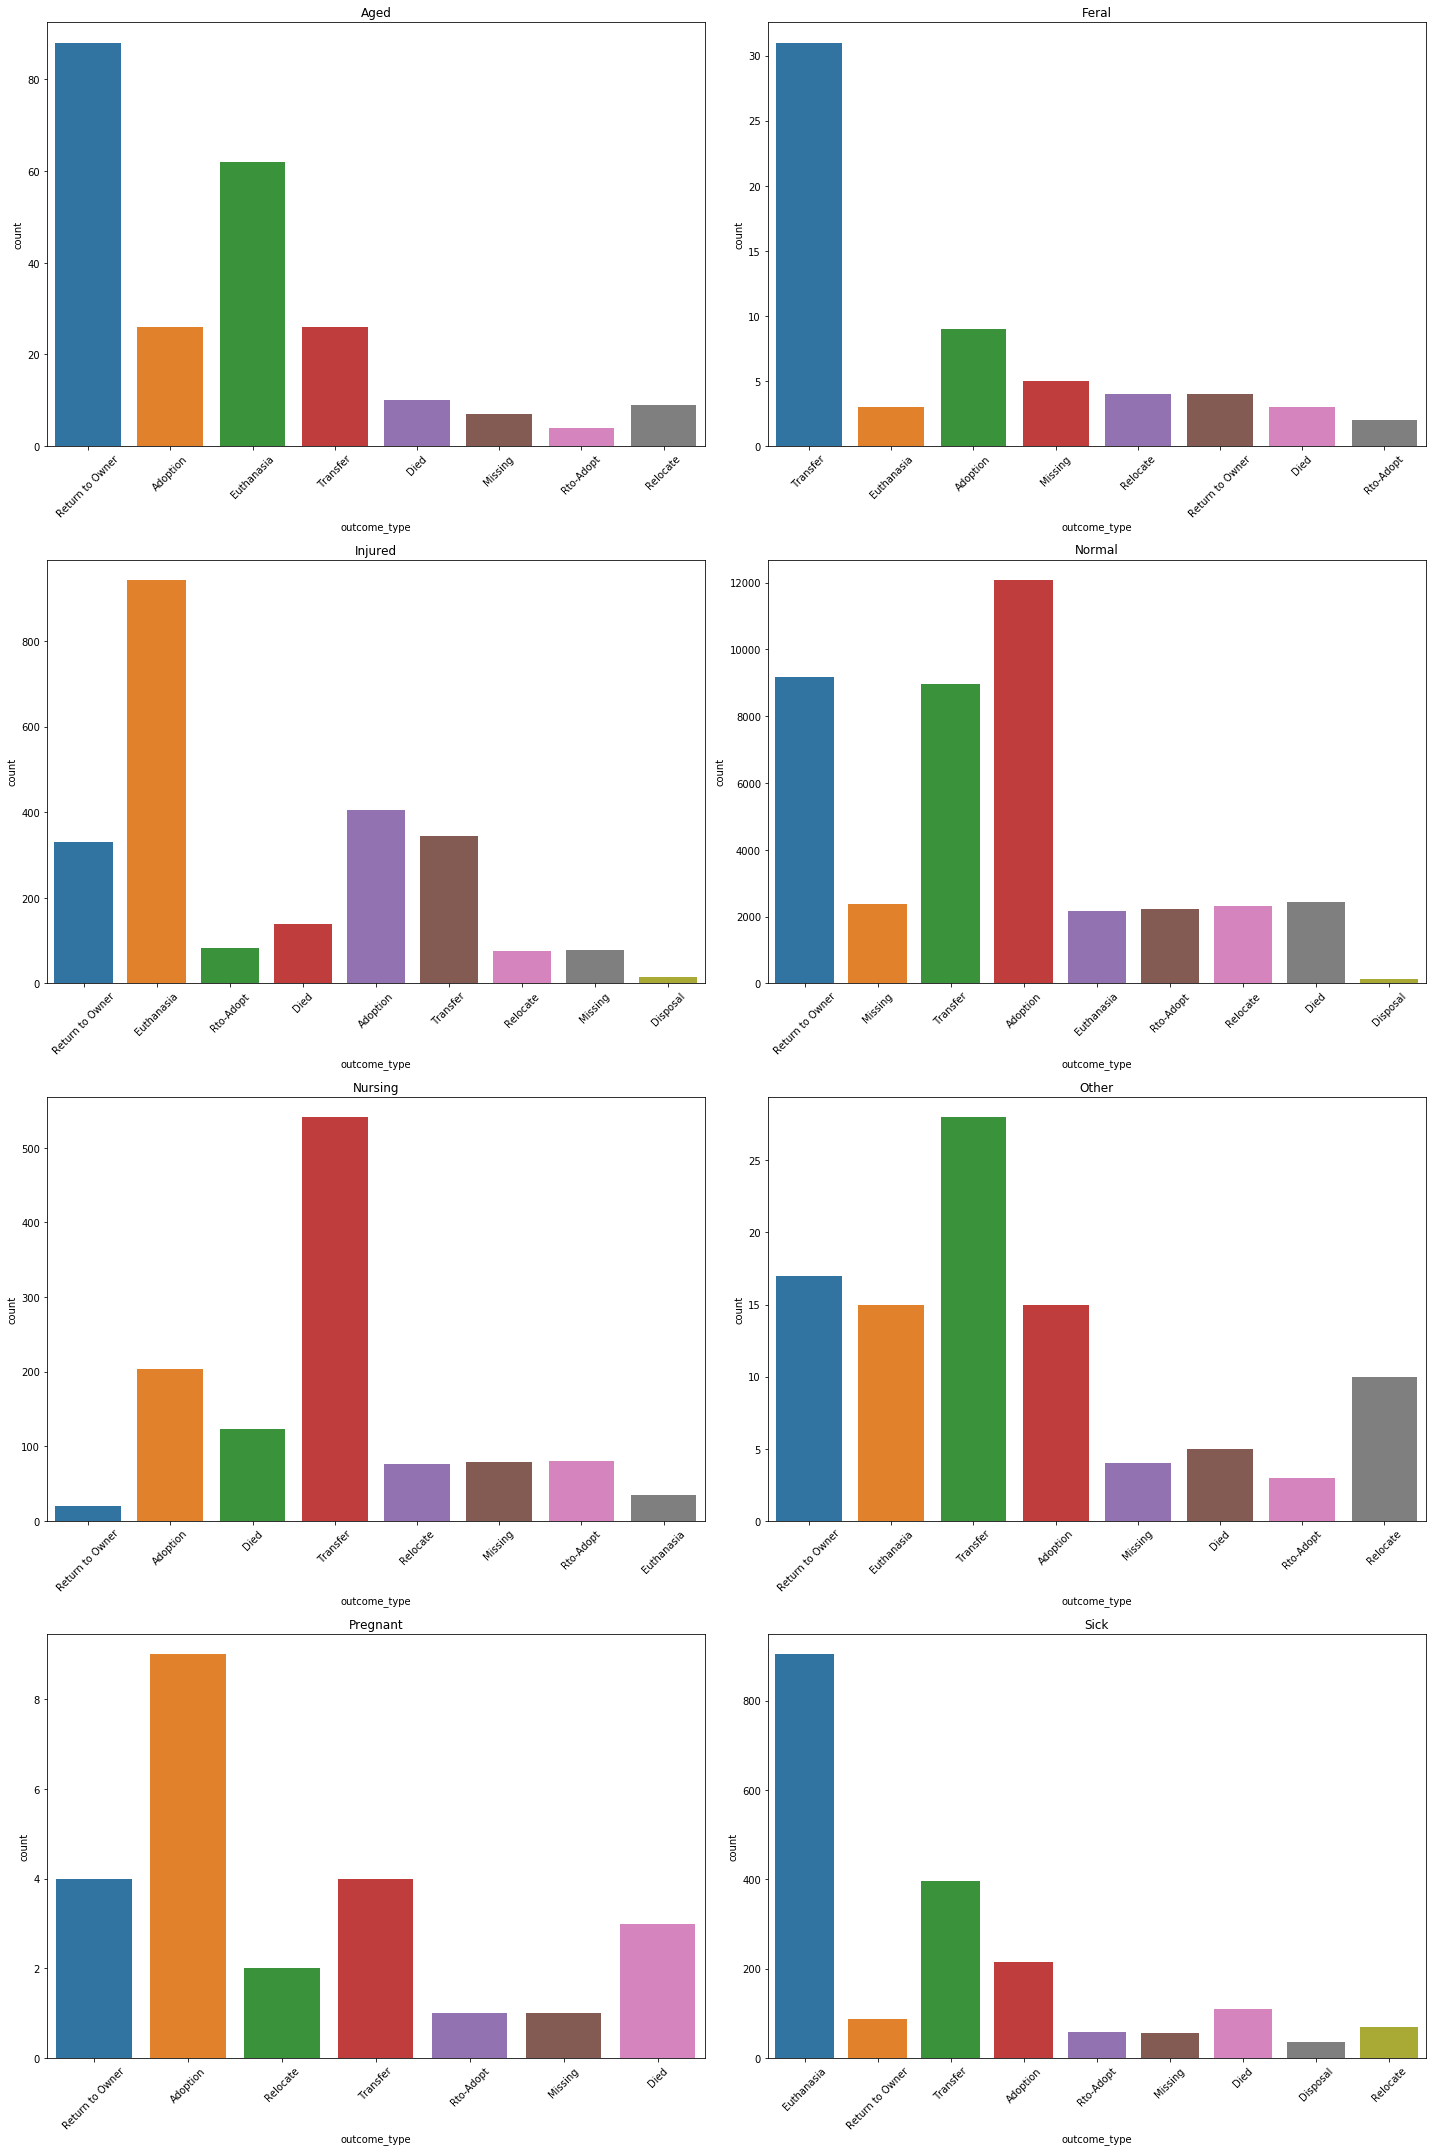

In [0]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Aged'], ax=axes[0,0])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Feral'], ax=axes[0,1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Injured'], ax=axes[1,0])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Normal'], ax=axes[1,1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Nursing'], ax=axes[2,0])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Other'], ax=axes[2,1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Pregnant'], ax=axes[3,0])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

x = sns.countplot(x='outcome_type', data=train[train['intake_condition']=='Sick'], ax=axes[3,1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)

axes[0][0].set_title("Aged")
axes[0][1].set_title("Feral")
axes[1][0].set_title("Injured")
axes[1][1].set_title("Normal")
axes[2][0].set_title("Nursing")
axes[2][1].set_title("Other")
axes[3][0].set_title("Pregnant")
axes[3][1].set_title("Sick")


plt.tight_layout()

**NOTE**

    *Intake condition feature seem  to play important role in outcome_type determination.
    *Aged animals are mostly returned to owners
    *Injured, Sicked ones are euthanized
    *Feral, Nursing types are often transfered

<h3>Feature Engineering</h3>

In [12]:
target = train['outcome_type']
train.drop('outcome_type', inplace=True, axis='columns')
df = pd.concat([train, test])
df.reset_index(drop=True, inplace=True)
print(train.shape, test.shape)
print(df.shape)

df.info()

(47803, 36) (31869, 36)
(79672, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 36 columns):
animal_id_outcome             79672 non-null object
dob_year                      79672 non-null int64
dob_month                     79672 non-null int64
age_upon_intake               79672 non-null object
animal_type                   79672 non-null object
breed                         79672 non-null object
color                         79672 non-null object
intake_condition              79672 non-null object
intake_type                   79672 non-null object
sex_upon_intake               79671 non-null object
count                         79672 non-null int64
age_upon_intake_(days)        79672 non-null int64
age_upon_intake_(years)       79672 non-null float64
age_upon_intake_age_group     79672 non-null object
intake_datetime               79672 non-null object
intake_month                  79672 non-null int64
intake_year                

In [0]:
#Based on the analysis and intution dropping the below columns and will create few of them from scratch
df.drop(labels = ['dob_year', 'dob_month', 'age_upon_intake', 'count', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 
'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'time_in_shelter', 'intake_number',
'date_of_birth', 'age_upon_outcome_(days)','age_upon_outcome', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'outcome_datetime',
'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour', 'outcome_number'], axis=1, inplace=True)

*Quick google search says purebred dogs are expensive and Mixed breeds have a lower chance of being 
born with an inherited congenital disease. This may have an effect on the outcome_type.*
          
*Creating isMix feature from this colum*

In [0]:
df['isMix'] = 0
df.loc[(df.breed.str.lower().str.contains('mix')) | (df.breed.str.lower().str.contains('/')), 'isMix'] = 1

*Creating a column to keep No.of colors of the animal has*

In [0]:
df['n_colors'] = df.color.str.split('/').apply(lambda x: len(x))

df.loc[df.color.str.lower().str.contains('tricolor'),'n_colors'] = 3

*Extracting as many info from intake_datetime column as required*

In [0]:
df['intake_datetime'] = pd.to_datetime(df['intake_datetime'])
df['intake_year'] = df['intake_datetime'].dt.year
df['intake_month'] = df['intake_datetime'].dt.month
df['intake_day'] = df['intake_datetime'].dt.day
df['intake_dayoftheyear'] = df['intake_datetime'].dt.dayofyear
df['day_of_week'] = df['intake_datetime'].dt.dayofweek
df['is_weekend'] = (df['intake_datetime'].dt.weekday>=5).astype(int)
df['week'] = df['intake_datetime'].dt.week

*Creating Outcome_datetime feature based on intake_time and time spent in shelter*

In [0]:
import datetime
df['outcome_datetime'] = df['intake_datetime'] + (df['time_in_shelter_days']*24).apply(lambda x: datetime.timedelta(hours=x))

In [0]:
df['outcome_year'] = df['outcome_datetime'].dt.year
df['outcome_month'] = df['outcome_datetime'].dt.month
df['outcome_day'] = df['outcome_datetime'].dt.day
df['outcome_dayoftheyear'] = df['outcome_datetime'].dt.dayofyear
df['outcome_day_of_week'] = df['outcome_datetime'].dt.dayofweek
df['outcome_is_weekend'] = (df['outcome_datetime'].dt.weekday>=5).astype(int)
df['outcome_week'] = df['outcome_datetime'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

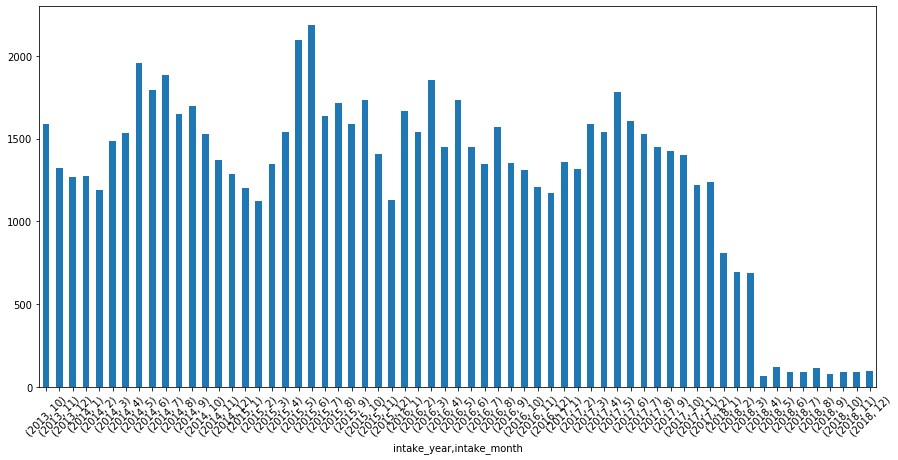

In [19]:
plt.figure(figsize=(15,7))
(df.groupby(['intake_year','intake_month']).size()).plot('bar')
plt.xticks(rotation=45)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

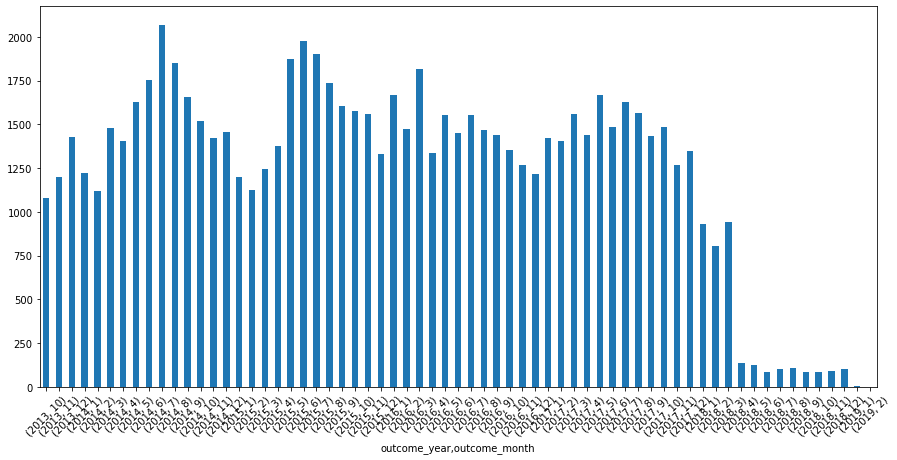

In [20]:
plt.figure(figsize=(15,7))
(df.groupby(['outcome_year','outcome_month']).size()).plot('bar')
plt.xticks(rotation=45)

*There seem to be a spike in trend around April, May, June and No.of intake has plunged after Feb-2016 in training data*

*For outcome, data spikes at May, June, July*

In [0]:
#df[(df.breed=='Dachshund')&(df['outcome_type']=='Return to Owner')].groupby(['outcome_type','sex_upon_intake','sex_upon_outcome']).size()

In [0]:
df.loc[df.animal_id_outcome=='A667395','sex_upon_intake'] = 'Spayed Female'
df.loc[df.animal_id_outcome=='A667395','sex_upon_outcome'] = 'Spayed Female'

In [0]:
df['age_upon_outcome_(days)'] = df['age_upon_intake_(days)'] + df['time_in_shelter_days']

In [0]:
df['isCastrated'] = 0
df.loc[(df['sex_upon_outcome'].str.lower().str.contains('neutered') | 
          df['sex_upon_outcome'].str.lower().str.contains('spayed')), 'isCastrated'] = 1
df.loc[df['sex_upon_intake']=='Unknown', 'isCastrated'] = 2

*Per analysis castrated animals are more likely for adoption, hence this feature*

In [0]:
df['sex'] = 1
df.loc[(df['sex_upon_outcome'].str.lower().str.contains('female')), 'sex'] = 0
df.loc[df['sex_upon_intake']=='Unknown', 'sex'] = 2

In [0]:
df['forCastration'] = 0
df.loc[((df['sex_upon_outcome'].str.lower().str.contains('neutered') | 
          df['sex_upon_outcome'].str.lower().str.contains('spayed')) & 
          (df['sex_upon_intake'].str.lower().str.contains('intact'))),'forCastration' ] = 1

df.loc[df['sex_upon_intake']=='Unknown', 'forCastration'] = 2

In [0]:
df.drop(labels =['animal_id_outcome','intake_datetime','outcome_datetime'],
           axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 29 columns):
animal_type                79672 non-null object
breed                      79672 non-null object
color                      79672 non-null object
intake_condition           79672 non-null object
intake_type                79672 non-null object
sex_upon_intake            79672 non-null object
age_upon_intake_(days)     79672 non-null int64
time_in_shelter_days       79672 non-null float64
sex_upon_outcome           79672 non-null object
isMix                      79672 non-null int64
n_colors                   79672 non-null int64
intake_year                79672 non-null int64
intake_month               79672 non-null int64
intake_day                 79672 non-null int64
intake_dayoftheyear        79672 non-null int64
day_of_week                79672 non-null int64
is_weekend                 79672 non-null int64
week                       79672 non-null int64
outcome_year      

In [30]:
to_encode = list(df.select_dtypes(include='object').columns)
to_encode

['animal_type',
 'breed',
 'color',
 'intake_condition',
 'intake_type',
 'sex_upon_intake',
 'sex_upon_outcome']

In [0]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()

df[to_encode] = df[to_encode].apply(coder.fit_transform)

In [0]:
train, test = df.iloc[:train.shape[0],:], df.iloc[train.shape[0]:,:]
test.reset_index(drop=True, inplace=True)

In [0]:
target = target.map({'Adoption' : 8, 'Transfer': 7, 'Return to Owner' : 6, 'Euthanasia' : 5, 'Died' : 4, 'Missing' : 3, 'Relocate' : 2, 'Rto-Adopt' : 1, 'Disposal' : 0})

In [0]:
X = train.copy()
y = target

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [44]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

xgb = xgb.XGBClassifier(n_jobs=-1)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
from sklearn.metrics import f1_score

y_pred = xgb.predict(X_test)

f1_score(y_test, y_pred, average='micro')

0.6084846456363484

In [50]:
animal_id = pd.read_csv('/content/drive/My Drive/Animal Shelter/test.csv',usecols=['animal_id_outcome'] )
animal_id

,animal_id_outcome
0,A723133
1,A723134
2,A723135
3,A723136
4,A723137
...,...
31864,A769060
31865,A769064
31866,A769065
31867,A769066


In [53]:
predictions = pd.DataFrame(xgb.predict(test), columns=['outcome_type'])

submission = pd.concat([animal_id, predictions], axis=1)
submission['outcome_type']= submission['outcome_type'].map({ 8 :'Adoption', 7: 'Transfer', 6: 'Return to Owner', 5 : 'Euthanasia' , 4 : 'Died' , 3 : 'Missing' , 2 : 'Relocate' ,  1 : 'Rto-Adopt' , 0 : 'Disposal' }).astype(str)
submission.to_csv('/content/drive/My Drive/Animal Shelter/xgb_basemodel.csv')

submission

,animal_id_outcome,outcome_type
0,A723133,Adoption
1,A723134,Adoption
2,A723135,Adoption
3,A723136,Transfer
4,A723137,Transfer
...,...,...
31864,A769060,Transfer
31865,A769064,Euthanasia
31866,A769065,Euthanasia
31867,A769066,Return to Owner
